# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

importando bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parso.python.tokenize import group
from scipy.stats import ttest_ind, mannwhitneyu
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

carregando o dataframe

In [39]:
dataframe = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
dataframe.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


vendo as informacoes da coluna

In [40]:
dataframe.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

senparando tres colunas do dataframe para alise descritivas

In [49]:
df = dataframe[['posse_de_imovel','posse_de_veiculo', 'renda']]
df

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37
...,...,...,...
14995,True,True,1193.29
14996,True,True,2519.18
14997,True,True,1586.85
14998,True,False,6975.39


No código abaixo, estamos agrupando os dados da coluna `renda` de acordo com os valores das variáveis qualitativas `posse_de_imovel` e `posse_de_veiculo`. Este processo permite realizar análises específicas sobre a renda em cada grupo.

In [2]:
# Dividindo renda por grupos das variáveis qualitativas
grupo_imovel = df.groupby('posse_de_imovel')['renda']
grupo_veiculo = df.groupby('posse_de_veiculo')['renda']

NameError: name 'df' is not defined

estamos imprimindo os resultado da estatistitica do imovel na qual foi comparado com a renda

In [51]:
# Estatisticas descritivas por gropos
print("Estatisticas descritivas - Posse de imovel:")
print(grupo_imovel.describe())

Estatisticas descritivas - Posse de imovel:
                   count         mean          std     min        25%  \
posse_de_imovel                                                         
False             4918.0  4426.970482  4569.558384  260.68  1822.4400   
True             10082.0  4721.052704  4654.266817  159.90  2012.2375   

                     50%       75%       max  
posse_de_imovel                               
False            3135.08  5405.255  67794.54  
True             3341.20  5726.260  89918.04  


mesmo processo emprimindo o resultado da estatistica do veiculo comparando com a renda

In [53]:
print("\nEstatisticas descritivas - Posse de veiculo:")
print(grupo_veiculo.describe())


Estatisticas descritivas - Posse de veiculo:
                   count         mean          std     min      25%      50%  \
posse_de_veiculo                                                               
False             9167.0  4390.506963  4545.776180  159.90  1825.39  3084.09   
True              5833.0  4992.579609  4732.823337  187.69  2143.41  3564.43   

                      75%       max  
posse_de_veiculo                     
False             5306.36  89918.04  
True              6086.56  67794.54  


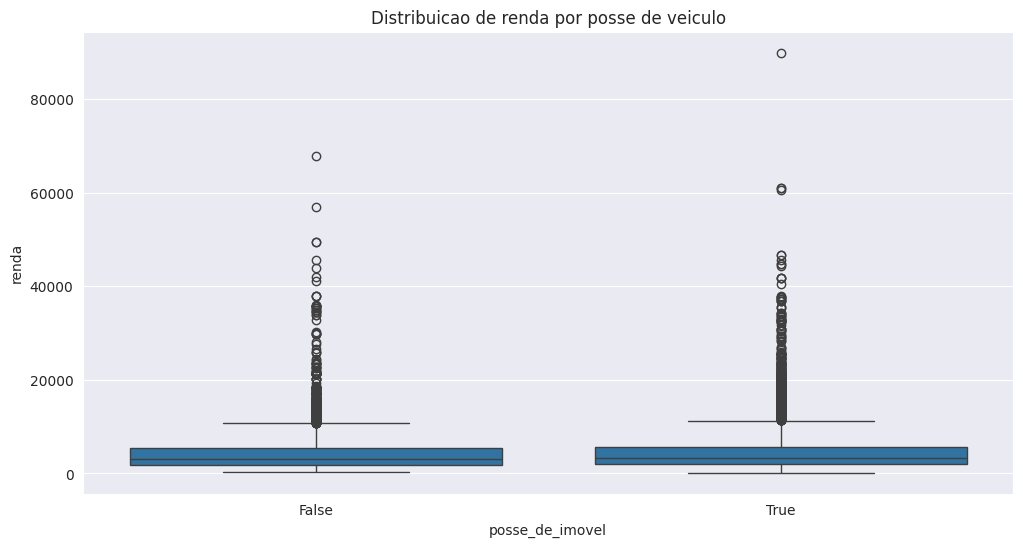

In [54]:
# Visualizacao - Posse de imovel
plt.figure(figsize=(12, 6))
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title("Distribuicao de renda por posse de veiculo")
plt.show()

Para ambos os grupos (True e False), a maior parte das rendas está concentrada em valores baixos (próximos do fundo da caixa).
Existem diversos outliers, o que indica que algumas pessoas têm rendas significativamente maiores que a maioria.
O grupo que possui imóvel (True) parece ter uma mediana de renda ligeiramente superior à do grupo que não possui imóvel (False) ^^

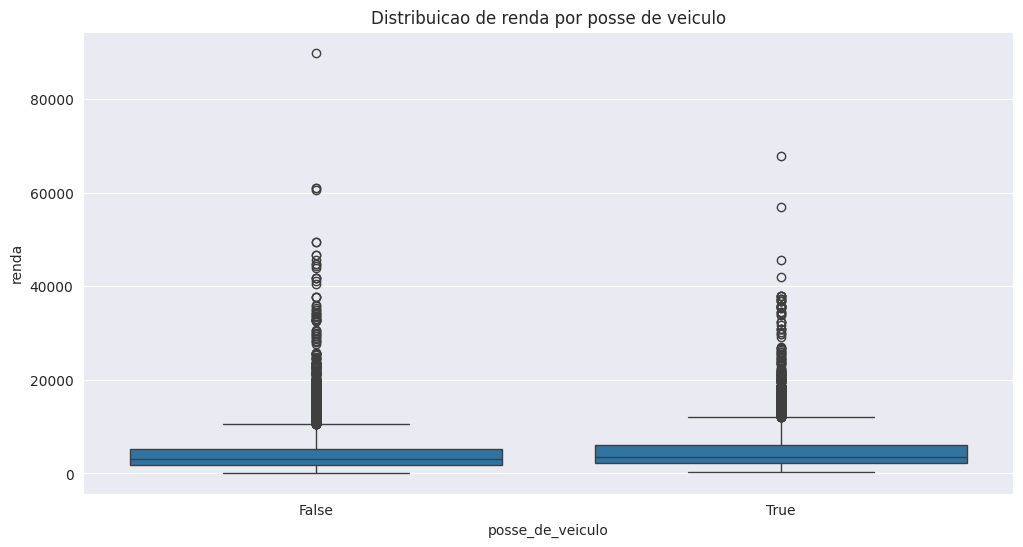

In [56]:
#visualizacao - Posse de veiculo
plt.figure(figsize=(12, 6))
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title("Distribuicao de renda por posse de veiculo")
plt.show()

A mediana da renda é parecida entre os dois grupos (True e False), sugerindo que a posse de veículo pode não ser um indicador forte de diferenças na renda.
O grupo que possui veículo (True) parece ter uma leve concentração de rendas mais altas (indicada por outliers mais frequentes em valores elevados).
Ambos os grupos possuem rendas predominantemente baixas, com muitos outliers acima de 20.000. ^^

In [61]:
# Testes estatisticos - Posse de imovel
renda_imovel_sim = df[df['posse_de_imovel'] == 'sim']['renda']
renda_imovel_nao = df[df['posse_de_imovel'] == 'nao']['renda']


Testando normalidade preliminarmente (opcional)
from scipy.stats import shapiro
print(shapiro(renda_imovel_sim)) # Apenas para verificar

In [63]:
# Realizar teste t de Student ou Mann-Whitney
ttest_imovel = ttest_ind(renda_imovel_sim, renda_imovel_nao, equal_var=False)
mannwhitney_imovel = mannwhitneyu(renda_imovel_sim, renda_imovel_nao)

/tmp/ipykernel_126308/2227420058.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_imovel = ttest_ind(renda_imovel_sim, renda_imovel_nao, equal_var=False)
/tmp/ipykernel_126308/2227420058.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mannwhitney_imovel = mannwhitneyu(renda_imovel_sim, renda_imovel_nao)


In [64]:
print(f"\nTeste T - Posse de Imóvel: {ttest_imovel}")
print(f"Teste de Mann-Whitney - Posse de Imóvel: {mannwhitney_imovel}")


Teste T - Posse de Imóvel: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
Teste de Mann-Whitney - Posse de Imóvel: MannwhitneyuResult(statistic=np.float64(nan), pvalue=np.float64(nan))


In [65]:
# Testes estatísticos - Posse de Veículo
renda_veiculo_sim = df[df['posse_de_veiculo'] == 'sim']['renda']
renda_veiculo_nao = df[df['posse_de_veiculo'] == 'não']['renda']

O objetivo é realizar um teste para verificar se há diferença significativa entre duas amostras, utilizando o teste t de Student ou o teste de Mann-Whitney.

In [66]:
# Realizar teste t de Student ou Mann-Whitney
ttest_veiculo = ttest_ind(renda_veiculo_sim, renda_veiculo_nao, equal_var=False)
mannwhitney_veiculo = mannwhitneyu(renda_veiculo_sim, renda_veiculo_nao)

/tmp/ipykernel_126308/1171585940.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_veiculo = ttest_ind(renda_veiculo_sim, renda_veiculo_nao, equal_var=False)
/tmp/ipykernel_126308/1171585940.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mannwhitney_veiculo = mannwhitneyu(renda_veiculo_sim, renda_veiculo_nao)


imprimindo resutados

In [67]:
print(f"\nTeste T - Posse de Veículo: {ttest_veiculo}")
print(f"Teste de Mann-Whitney - Posse de Veículo: {mannwhitney_veiculo}")


Teste T - Posse de Veículo: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
Teste de Mann-Whitney - Posse de Veículo: MannwhitneyuResult(statistic=np.float64(nan), pvalue=np.float64(nan))
